In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import EDA
import regression
import outlier


df = pd.read_csv('ship-data.csv')
train_index = int(df.shape[0] * .8)
df_train = df[:train_index]
df_test = df[train_index:]

# Speed
v = df[df.columns[11]].values
u = df[df.columns[12]].values
x = np.concatenate([v.reshape(-1, 1), u.reshape(-1, 1)], axis=1)
prd = outlier.Rc(x).fit(.002)
df.loc[prd == -1, 'Speed Through Water (knots)'] = df.loc[prd == -1, 'Speed Over Ground (knots)']

# Draft
df.loc[df[df.columns[6]]==0, df.columns[6]] = df.loc[df[df.columns[6]]==0, df.columns[7]]
df.loc[791:796, df.columns[19]] = df.loc[781:790, df.columns[19]].mean()
df.loc[2194:2211, df.columns[19]] = df.loc[2192:2193, df.columns[19]].mean()

# Power
power = ['Time', 'Shaft Speed (RPM)', 'Shaft Torque (kNm)',
       'Shaft Power (kW)']
df_all = df.drop(power, 1)

df_train = df_all[:train_index]
df_test = df_all[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

df1 = df_all.drop('Speed Through Water (knots)', 1)
df1['Trim'] = df1['Draft Forward (meters)'] - df1['Draft Aft (meters)']

pca = PCA(n_components=1, random_state=42)
df1['Draft'] = pca.fit_transform(df.iloc[:, 4:8])

# Wind
wind = ['Weather Service True Wind Speed (knots)', 'Weather Service True Wind Direction (degrees from north)']
df3 = df1.drop(wind, 1)
# df3['Wind'] = df3['Weather Service Apparent Wind Speed (knots)'] * np.cos(df3['Weather Service Apparent Wind Direction (degrees from bow)'])

# Current
df3['Apparent Current Direction'] = df3['Heading (degrees)'] - df3['Weather Service Sea Current Direction (degrees from north)']
df3['Apparent Current Speed'] = df3['Weather Service Sea Current Speed (knots)'] * np.cos(df3['Apparent Current Direction'])
current = ['Weather Service Sea Current Speed (knots)', 'Weather Service Sea Current Direction (degrees from north)']
# df4 = df3.drop(current, 1)
df4 = df3

df_train = df4[:train_index]
df_test = df4[train_index:]

xtr = df_train.drop('Main Engine Fuel Consumption (MT/day)', 1).values
ytr = df_train['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

xte = df_test.drop('Main Engine Fuel Consumption (MT/day)', 1).values
yte = df_test['Main Engine Fuel Consumption (MT/day)'].values.reshape(-1, 1)

model = regression.Rf(xtr, ytr)
model.fit()

model.model.fit(xtr, ytr)
regression.Test(model.model, xte, yte).score()

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tianyi/Documents/data_practice/VesselTimeSeries/regression.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(self.xtr, self.ytr)


Train set accuracy:
0.9978677809550774
Test set accuracy:
0.9878126951259298


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy:
0.965904946773087
RMSE:
3.082353344072317
MAE:
2.027713406783622


In [15]:
df4['Relation'] = df4.iloc[:, 0]/(df4.iloc[:, 7]+1)

In [16]:
df5 = df4.loc[df4.Relation < 5]

In [21]:
df5.columns

Index(['Main Engine Fuel Consumption (MT/day)', 'Main Engine Using HFO (bool)',
       'Main Engine Using MGO (bool)', 'Draft Forward (meters)',
       'Draft Aft (meters)', 'Draft Mid-1 (meters)', 'Draft Mid-2 (meters)',
       'Speed Over Ground (knots)', 'Heading (degrees)',
       'Rudder Angle (degrees)', 'Weather Service Apparent Wind Speed (knots)',
       'Weather Service Apparent Wind Direction (degrees from bow)',
       'Weather Service Temperature (celsius)',
       'Weather Service Sea Current Direction (degrees from north)',
       'Weather Service Sea Current Speed (knots)', 'Water Depth (meters)',
       'Trim', 'Draft', 'Apparent Current Direction', 'Apparent Current Speed',
       'Relation'],
      dtype='object')

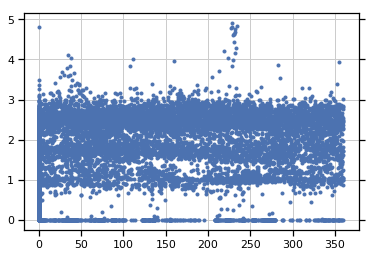

In [22]:
plt.scatter(df5['Weather Service Sea Current Direction (degrees from north)'], df5['Relation'], marker='.')
plt.show()